# 기계학습 (60점)

## 데이터 설명
출처 : https://hbiostat.org/data/repo/cvlbw (후처리)     
데이터 설명 : 극소저체중아 (37주 미만, 1.6kg 미만 출산 유아의 사망정보를 담은 데이터) / 종속변수 dead


| **컬럼명** | **설명** | **단위** | **수준(Levels)** | **결측치(NA)** |
|------------|----------|----------|------------------|----------------|
| **lowph** | 생후 4일 내 최저 pH | - | - | 62 |
| **pltct** | 혈소판 수 | - | - | 70 |
| **race** | 인종 | - | 백인(white), 흑인(black), 원주민(native American), 동양인(oriental) | 25 |
| **bwt** | 출생 체중 | g(그램) | - | 2 |
| **gest** | 임신 주수 | 주(weeks) | - | 4 |
| **inout** | 출생 장소 | - | 병원(at hospital), 이송중 출산(transported) | 3 |
| **twn** | 다태아 여부(다중 임신) | - | - | 20 |
| **meth** | 어머니의 베타-메타손 치료 여부 | - | - | 106 |
| **toc** | 어머니의 베타-아드레날린 약물(진통 억제제) 치료 여부 | - | - | 106 |
| **delivery** | 분만 방식 | - | 제왕절개(abdominal), 질식(vaginal) | 22 |
| **vent** | 인공호흡기 사용 여부 | - | - | 30 |
| **pneumo** | 기흉 발생 여부 | - | - | 26 |
| **pda** | 동맥관 개존증(PDA) 진단 여부 | - | - | 29 |
| **cld** | 생후 30일 시 보충 산소 사용 여부 | - | - | 66 |
| **pvh** | 뇌실 주위 출혈 | - | 없음(absent), 가능성 있음(possible), 확실(definite) | 145 |
| **ivh** | 뇌실 내 출혈 | - | 없음(absent), 가능성 있음(possible), 확실(definite) | 144 |
| **ipe** | 뇌실 주위 백질연화증 | - | 없음(absent), 가능성 있음(possible), 확실(definite) | 144 |
| **sex** | 성별 | - | 여성(female), 남성(male) | 21 |
| **dead** | 사망 여부 | - | 0(생존), 1(사망) | 0 |

In [1]:
import pandas as pd
df= pd.read_csv('./data/vlbw.csv')
df.head()

,lowph,pltct,race,bwt,gest,inout,twn,meth,toc,delivery,vent,pneumo,pda,cld,pvh,ivh,ipe,sex,dead
0,NaN,100.0,white,1250.0,35.0,born at Duke,0.0,0.0,0.0,abdominal,0.0,0.0,0.0,0.0,NaN,NaN,NaN,female,0
1,7.250000,244.0,white,1370.0,32.0,born at Duke,0.0,1.0,0.0,abdominal,0.0,0.0,0.0,0.0,NaN,NaN,NaN,female,0
2,7.059998,114.0,black,620.0,23.0,born at Duke,0.0,0.0,1.0,vaginal,1.0,0.0,0.0,NaN,NaN,NaN,NaN,female,1
3,7.250000,182.0,black,1480.0,32.0,born at Duke,0.0,1.0,0.0,vaginal,0.0,0.0,0.0,0.0,NaN,NaN,NaN,male,0
4,6.969997,54.0,black,925.0,28.0,born at Duke,0.0,0.0,0.0,abdominal,1.0,1.0,0.0,0.0,definite,definite,NaN,female,1


## 1-1   
뇌출혈 관련 변수 3개 (pvh, ivh, ipe)의 변수들 간의 연관성을 확인하려한다.     
변수를 두개씩 조합하여 교차표를 만들고 적절한 방법을 통해 연관성을 판단하라.    

In [2]:

cr1= pd.crosstab(df['pvh'],df['ivh']) # , dropna=False 옵션은 결측치
cr2= pd.crosstab(df['pvh'],df['ipe'])
cr3= pd.crosstab(df['ivh'],df['ipe'])

display(cr1)
display(cr2)
display(cr3)

from scipy.stats import chi2_contingency
chi2, p1, dof, expected = chi2_contingency(cr1)
chi2, p2, dof, expected = chi2_contingency(cr2)
chi2, p3, dof, expected = chi2_contingency(cr3)
print(p1, p2, p3)
print('ipe,pvh는 카이제곱 검정결과 p값이 0.05 크므로 독립(연관성이 없음)으로 볼 수 있고, ivh,pvh와 ipe,ivh는 p값이 0.05보다 작으므로 독립이 아님(연관성이 있음)으로 볼 수 있다.')

ivh,absent,definite,possible
pvh,,,
absent,321,34,5
definite,81,39,5
possible,39,2,0


ipe,absent,definite,possible
pvh,,,
absent,330,20,10
definite,105,15,4
possible,35,3,3


ipe,absent,definite,possible
ivh,,,
absent,412,16,14
definite,50,21,3
possible,9,1,0


4.049838833038924e-09 0.07848099910469895 4.6325911688746815e-12
ipe,pvh는 카이제곱 검정결과 p값이 0.05 크므로 독립(연관성이 없음)으로 볼 수 있고, ivh,pvh와 ipe,ivh는 p값이 0.05보다 작으므로 독립이 아님(연관성이 있음)으로 볼 수 있다.


## 1-2

아래의 기준을 참고하여 파생변수 두개 Bleed, Ind를 생성하라.

`Bleed` 
- pvh,ivh,ipe가 모두 absent 값이라면 0, 셋 중 하나라도 positive or definite이면 1, 그 외 na

`Ind`
- pvh,ivh,ipe를 제외한 모든 컬럼이 결측치가 없으면 0, bleed가 결측이면 1, 나머지는 2

In [3]:
df['Bleed'] = None
df.loc[(df['pvh']=='absent') & (df['ivh']=='absent') & (df['ipe']=='absent'), 'Bleed'] = 0
df.loc[(df['pvh']=='definite') | (df['ivh']=='definite') | (df['ipe']=='definite')|(df['pvh']=='positive') | (df['ivh']=='positive') | (df['ipe']=='positive'), 'Bleed'] = 1


df['Ind'] = 2
df.loc[df.drop(columns =['pvh','ivh','ipe']).isnull().sum(axis=1) ==0,'Ind'] = 0
df.loc[df['Bleed'].isnull(),'Ind'] =1

pd.crosstab(df['Ind'],df['Bleed'], dropna=False)

Bleed,0.0,1.0,NaN
Ind,,,
0,240,110,0
1,0,0,193
2,66,62,0


## 1-3
pvh,ivh,ipe 컬럼을 제외하고 나머지 컬럼들에 대한 전처리를 진행하라
- 결측치 처리 (Bleed 컬럼 제외)
- 범주형 변수 변환
- dead를 종속변수로 가정하고 모델링에 적합하지 않다 생각하는 변수 제거 등

In [4]:
pd.set_option('display.max_columns',30)
df_pre = df.copy()

# 결측치 처리 전 
display(df_pre.isnull().sum().to_frame().T)


# 범주형 컬럼 
cat = ['race','inout','twn','meth','toc','delivery','vent','pneumo','pda','cld','sex']

for cat_col in cat:
    df[cat_col] = df[cat_col].fillna(df[cat_col].mode()[0])

# 수치형
numeric = ['lowph','pltct','bwt','gest']

for numeric_col in numeric:
    df[numeric_col] = df[numeric_col].fillna(df[numeric_col].mean())

display(df.isnull().sum().to_frame().T)

# 범주형 변수 변환, 바이너리 변수는 그대로 둔다.
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
for cat_col in ['race' ,'inout' ,'delivery','sex']:
    df[cat_col] = le.fit_transform(df[cat_col])

,lowph,pltct,race,bwt,gest,inout,twn,meth,toc,delivery,vent,pneumo,pda,cld,pvh,ivh,ipe,sex,dead,Bleed,Ind
0,62,70,25,2,4,3,20,106,106,22,30,26,29,66,145,144,144,21,0,193,0


,lowph,pltct,race,bwt,gest,inout,twn,meth,toc,delivery,vent,pneumo,pda,cld,pvh,ivh,ipe,sex,dead,Bleed,Ind
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,145,144,144,0,0,193,0


범주형 컬럼은 최빈값, 수치형 컬럼은 평균값으로 결측치를 대치했다.

## 1-4
시각화를 포함한 EDA를 진행하라. 

dead,0,1
lowph,7.231783,7.074912
pltct,208.448485,169.707547
bwt,1160.474383,846.760563
gest,29.541905,26.408451


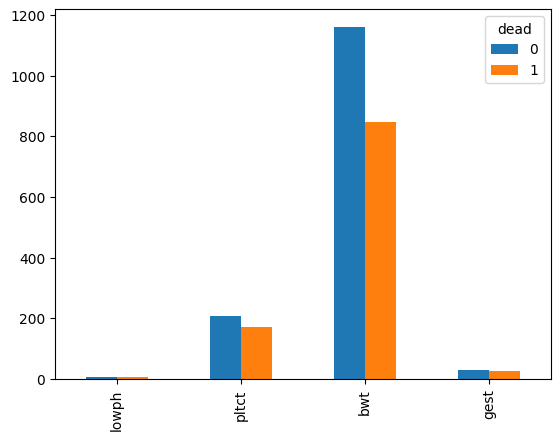

(np.float64(0.0), np.float64(1.0), np.float64(0.0), np.float64(1.0))

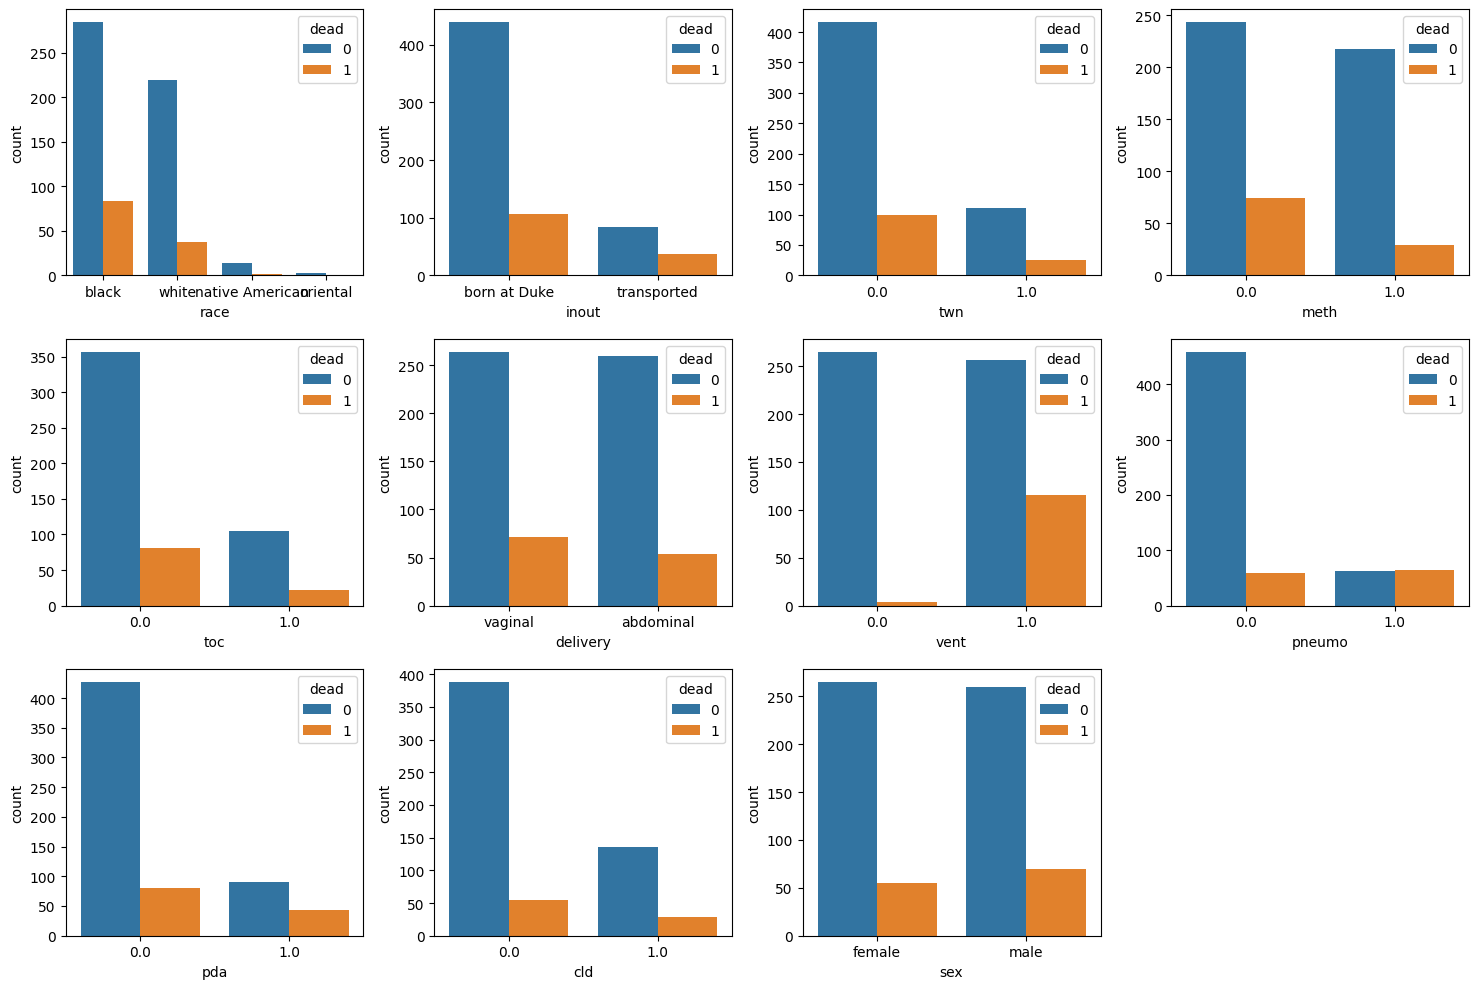

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns


display(df_pre[numeric + ['dead']].groupby(['dead']).mean(numeric_only=True).T)
df_pre[numeric + ['dead']].groupby(['dead']).mean(numeric_only=True).T.plot(kind='bar')
plt.show()


fig,axes = plt.subplots(3,4,figsize=(15,10))

for i,ax in enumerate(axes.flatten()):
    if i ==11:
        break
    d = df_pre[[cat[i],'dead']].value_counts().reset_index()
    
    sns.barplot(x=cat[i],y='count',hue='dead',data=d,ax=ax)

plt.tight_layout()
axes.flatten()[-1].axis('off')

범주형과 수치형에 대해서 dead를 기준으로 나누었다.

# 1-5
Bleed를 예측하기 위한 단일 알고리즘 모델과 앙상블 모델을 비교 분석 서술하라.
1. dead,pvh,ivh,ipe,Ind 컬럼은 제외
2. 종속변수는 Bleed, Bleed가 결측치인 경우 해당 행 제외
3. Ind값이 2인 데이터는 학습에 사용하고, Ind가 0인 데이터로 테스트를 진행하라
4. 적절한 평가지표를 선택하라
5. 변수중요도를 구해서 중요한 2개변수는 따로 출력을 한다.

In [6]:
trian = df[df.Ind==2].copy().reset_index(drop=True)
test  = df[df.Ind==0].copy().reset_index(drop=True)

def preprocessing(df):
    df = df.drop(columns=['pvh','ivh','ipe','dead','Ind']).copy()
    df = df[df.Bleed.notnull()].reset_index(drop=True)
    return df

train = preprocessing(trian)
test  = preprocessing(test)


from sklearn.metrics import f1_score,accuracy_score
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier

x_train = train.drop(columns=['Bleed'])
y_train = train['Bleed'].astype('category')
x_test  = test.drop(columns=['Bleed'])
y_test  = test['Bleed'].astype('category')

rf = RandomForestClassifier(random_state=0)
rf.fit(x_train,y_train)
rf_test_y_pred = rf.predict(x_test)
rf_f1 = f1_score(y_test,rf_test_y_pred)
rf_acc = accuracy_score(y_test,rf_test_y_pred)


dt = DecisionTreeClassifier(random_state=0)
dt.fit(x_train,y_train)
dt_test_y_pred = dt.predict(x_test)
dt_f1 = f1_score(y_test,dt_test_y_pred)
dt_acc = accuracy_score(y_test,dt_test_y_pred)

print(f'RandomForestClassifier f1:{rf_f1}, acc:{rf_acc}')
print(f'DecisionTreeClassifier f1:{dt_f1}, acc:{dt_acc}')

feature = pd.DataFrame()
feature['feautre'] = rf.feature_names_in_
feature['importance'] = rf.feature_importances_ 
feature.head(2)

RandomForestClassifier f1:0.43018867924528303, acc:0.5685714285714286
DecisionTreeClassifier f1:0.3786008230452675, acc:0.5685714285714286


,feautre,importance
0,lowph,0.179123
1,pltct,0.148671


앙상블 모델에서 좀 더 높은 f1 스코어를 보였다. 하지만 적절하게 이진분류를 한다고 보기는 어렵다. 추가적인 피처 엔지니어링과 모델 튜닝이 필요하다.    
lowph와 pltct가 모델의 상위 2개 변수중요도를 가졌다.

# 1-6
dead 컬럼을 예측하기 위한 기계학습 모델
1. pvh,ivh,ipe,Ind 제외 / Bleed 포함
2. Ind 값이 1,2인 경우 학습데이터 / 0인 경우 테스트데이터
3. 모델링 및 평가 방식은 1-5와 동일하게 진행

In [7]:
trian = df[(df.Ind==2) | (df.Ind ==1)].copy().reset_index(drop=True)
test  = df[df.Ind==0].copy().reset_index(drop=True)

def preprocessing(df):
    df = df.drop(columns=['pvh','ivh','ipe','Ind']).copy()
    df = df[df.Bleed.notnull()].reset_index(drop=True)
    return df

train = preprocessing(trian)
test  = preprocessing(test)


from sklearn.metrics import f1_score,accuracy_score
from sklearn.tree import DecisionTreeClassifier 
from sklearn.ensemble import RandomForestClassifier

x_train = train.drop(columns=['dead'])
y_train = train['dead'].astype('category')
x_test  = test.drop(columns=['dead'])
y_test  = test['dead'].astype('category')

rf = RandomForestClassifier(random_state=0)
rf.fit(x_train,y_train)
rf_test_y_pred = rf.predict(x_test)
rf_f1 = f1_score(y_test,rf_test_y_pred)
rf_acc = accuracy_score(y_test,rf_test_y_pred)


dt = DecisionTreeClassifier(random_state=0)
dt.fit(x_train,y_train)
dt_test_y_pred = dt.predict(x_test)
dt_f1 = f1_score(y_test,dt_test_y_pred)
dt_acc = accuracy_score(y_test,dt_test_y_pred)

print(f'RandomForestClassifier f1:{rf_f1}, acc:{rf_acc}')
print(f'DecisionTreeClassifier f1:{dt_f1}, acc:{dt_acc}')

feature = pd.DataFrame()
feature['feautre'] = rf.feature_names_in_
feature['importance'] = rf.feature_importances_ 
feature.head(2)

RandomForestClassifier f1:0.46808510638297873, acc:0.8571428571428571
DecisionTreeClassifier f1:0.23529411764705882, acc:0.7028571428571428


,feautre,importance
0,lowph,0.096052
1,pltct,0.098380


1-5보다는 accuracy는 올랐지만 f1스코어에서는 미비한 상승이 있었다. test 테이터의 데이터 불균형 떄문이다. 이진분류는 전반적으로 잘됐다고 보기 어렵다.    
변수중요도의 경우 상위 2개의 컬럼은 이전 모델링 과정과 동일하지만 중요도 자체의 값은 희석됐다.

## 데이터 설명

출처: 데이터 포털 (https://www.data.go.kr/data/15065269/fileData.do) + 후처리     
설명:
1. 전력량데이터 (m2_source.csv)
   - 21~23년의 A지역에서의 시간대별 태양열, 풍력 발전기에 의한 발전량
3. 기상데이터 (m2_weather.csv)
   - 21~23년의 A지역에서의 시간대별 기상정보에 대한 데이터

In [2]:
import pandas as pd

df1 = pd.read_csv('./data/m2_source.csv')
df2 = pd.read_csv('./data/m2_weather.csv')

display(df1.head(2))
display(df2.head(2))

,일자,자원,hour_1,hour_2,hour_3,hour_4,hour_5,hour_6,hour_7,hour_8,...,hour_15,hour_16,hour_17,hour_18,hour_19,hour_20,hour_21,hour_22,hour_23,hour_24
0,2021-01-01,태양광,0.00,0.00,0.00,0.00,0.01,0.00,0.00,0.07,...,22.62,15.22,8.02,1.89,0.10,0.81,0.11,0.01,0.01,0.01
1,2021-01-01,풍력,119.64,105.18,106.19,76.71,65.16,79.13,47.67,39.37,...,29.19,27.11,23.78,19.02,36.62,24.00,19.66,14.78,23.45,21.14


,일시,기온,강수량,풍속,습도,일조,일사,적설,전운량,지면온도
0,2021_01_01@0,4.5,NaN,6.1,53.0,NaN,NaN,NaN,9.0,2.2
1,2021_01_01@1,4.3,NaN,5.6,58.0,NaN,NaN,NaN,9.0,2.4


## 2-1
아래의 기준에 맞춰 전처리를 작업하고 최종 데이터의 전체 데이터 평균값(일시제외)을 출력하라 

1. 전력량 데이터에서 결측치를 제거하라.
    - 결측치가 존재하는 시간대의 동일 일자, 동일 자원 데이터의 직전 값과 다음 값의 평균으로 대치한다.
    - 연속된 시간대의 결측치가 있다면 결측치가 아닌 이전 시간대의 값과 이후 시간대의 값의 평균으로 모든 연속 시간대 결측치를 대치한다.
    - 맨앞이나 맨뒤에 결측치가 존재한다면 직전, 직후 시간대 값으로 대치한다.
2. 결측치를 제거한 전력량 데이터에 대해 총전력량(태양광 + 풍력 발전량의 합)을 구한다.
    - 동일 일자 동일 시간대에 대해 태양광과 풍력의 합을 구한다. 하나의 일자는 하나의 행에 시간대별 총전력량을 표현해야한다.
    - 특정일자에 태양광 또는 풍력이 하나만 있는 경우에는 해당 자원의 전력량을 2배로 한다.
3. 파생변수를 생성한다.
    - 변수명 season
    - 3-5월 0, 6-8월 1, 9-10월 2, 11-12월 3
        - 참고 : 실제 시험에서 1,2월에 대한 언급이 없었음, (풀이에 관련 언급을 하고 해당 데이터 제거하고 풀기) 
4. 기상데이터의 일시를 적절한 `년-월-일 시간` 형식으로 변경한다.
5. 기상데이터의 결측치를 처리한다
    - 강수량, 일조, 일사, 적설은 0으로 채운다.
    - 풍속, 습도는 직전값으로 전운량과 지면온도는 전체 평균값으로 대치한다.
6. 두 데이터를 `년-월-일 시간` 값을 기준으로 합친다.
    - 전력량 데이터의 시간 컬럼은 숫자 1을 빼야 기상데이터와 매핑이 된다. (hour_1 : 기상데이터의 0시)
    - 최종 데이터의 컬럼은 일시, 총전력량, season, 기온, 강수량, 풍속, 습도, 일조, 일사, 적설, 전운량, 지면온도 총 12개의 컬럼을 가진다.

In [3]:
#아래의 기준에 맞춰 전처리를 작업하고 최종 데이터의 전체 데이터 평균값(일시제외)을 출력하라 

# 결측치 채우기
# 1. 전력량 데이터에서 결측치를 제거하라.
#     - 결측치가 존재하는 시간대의 동일 일자, 동일 자원 데이터의 직전 값과 다음 값의 평균으로 대치한다.
#     - 연속된 시간대의 결측치가 있다면 결측치가 아닌 이전 시간대의 값과 이후 시간대의 값의 평균으로 모든 연속 시간대 결측치를 대치한다.
#     - 맨앞이나 맨뒤에 결측치가 존재한다면 직전, 직후 시간대 값으로 대치한다.

power = df1.copy()
power['hour_1']= power['hour_1'].fillna(power['hour_2'])
power['hour_24']= power['hour_24'].fillna(power['hour_23'])

power_mean = (power.iloc[:,2:].ffill(axis=1) + power.iloc[:,2:].bfill(axis=1))/2
power.iloc[:,2:] = power_mean


# 총 전력량
# 2. 결측치를 제거한 전력량 데이터에 대해 총전력량(태양광 + 풍력 발전량의 합)을 구한다.
#     - 동일 일자 동일 시간대에 대해 태양광과 풍력의 합을 구한다. 하나의 일자는 하나의 행에 시간대별 총전력량을 표현해야한다.
#     - 특정일자에 태양광 또는 풍력이 하나만 있는 경우에는 해당 자원의 전력량을 2배로 한다.

power['일자'].value_counts().value_counts() # 모든일자에 2개 값을 가짐
power_sum = power.drop(columns =['자원']).groupby(['일자']).sum().reset_index()

# 파생변수
# 3. 파생변수를 생성한다.
#     - 변수명 season
#     - 3-5월 0, 6-8월 1, 9-10월 2, 11-12월 3
#         - 참고 : 실제 시험에서 1,2월에 대한 언급이 없었음, (풀이에 관련 언급을 하고 해당 데이터 제거하고 풀기) 

power_sum['일자'] = pd.to_datetime(power_sum['일자'])
power_sum['season'] = power_sum['일자'].dt.month.map({3:0,4:0,5:0,6:1,7:1,8:1,9:2,10:2,11:3,12:3})
power_sum = power_sum[power_sum.season.notnull()].reset_index(drop=True)

# 기상데이터 일시
# 4. 기상데이터의 일시를 적절한 `년-월-일 시간` 형식으로 변경한다.

weather = df2.copy()
weather['일시'] = pd.to_datetime(weather['일시'].map(lambda x : x.split('@')[0].replace('_','-') + ' ' + x.split('@')[1].zfill(2)))

# 기상데이터 결측치 처리
# 5. 기상데이터의 결측치를 처리한다
#     - 강수량, 일조, 일사, 적설은 0으로 채운다.
#     - 풍속, 습도는 직전값으로 전운량과 지면온도는 전체 평균값으로 대치한다. + 기온도 직전값

weather['강수량'] = weather['강수량'].fillna(0)
weather['일조'] = weather['일조'].fillna(0)
weather['기온'] = weather['기온'].fillna(method='ffill') # 워닝 제거 하려면 ffill 자체를 메소드로 사용하기
weather['일사'] = weather['일사'].fillna(0)
weather['적설'] = weather['적설'].fillna(0)
weather['풍속'] = weather['풍속'].fillna(method='ffill')
weather['습도'] = weather['습도'].fillna(method='ffill')
weather['전운량'] = weather['전운량'].fillna(weather['전운량'].mean())
weather['지면온도'] = weather['지면온도'].fillna(weather['지면온도'].mean())


# 데이터 합치기
# 6. 두 데이터를 `년-월-일 시간` 값을 기준으로 합친다.
#     - 전력량 데이터의 시간 컬럼은 숫자 1을 빼야 기상데이터와 매핑이 된다. (hour_1 : 기상데이터의 0시)
#     - 최종 데이터의 컬럼은 일시, 총전력량, season, 기온, 강수량, 풍속, 습도, 일조, 일사, 적설, 전운량, 지면온도 총 12개의 컬럼을 가진다.


power_sum_melt = power_sum.melt(id_vars=['일자','season'], var_name='hour', value_name='총전력량')
power_sum_melt['일시'] = power_sum_melt['일자'] + pd.to_timedelta(power_sum_melt['hour'].str.split('_').str[1].astype(int)-1, unit='h')
final = pd.merge(power_sum_melt, weather, on='일시', how='left').drop(columns=['일자','hour'])
final

/var/folders/0c/m1b4q_z52zld8x37by80fyv00000gn/T/ipykernel_95041/1002950749.py:48: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  weather['기온'] = weather['기온'].fillna(method='ffill') # 워닝 제거 하려면 ffill 자체를 메소드로 사용하기
/var/folders/0c/m1b4q_z52zld8x37by80fyv00000gn/T/ipykernel_95041/1002950749.py:51: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  weather['풍속'] = weather['풍속'].fillna(method='ffill')
/var/folders/0c/m1b4q_z52zld8x37by80fyv00000gn/T/ipykernel_95041/1002950749.py:52: FutureWarning: Series.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  weather['습도'] = weather['습도'].fillna(method='ffill')


,season,총전력량,일시,기온,강수량,풍속,습도,일조,일사,적설,전운량,지면온도
0,0.0,99.59,2021-03-01 00:00:00,16.6,0.0,4.6,73.0,0.0,0.0,0.0,6.0,12.3
1,0.0,162.78,2021-03-02 00:00:00,8.2,2.4,6.1,85.0,0.0,0.0,0.0,10.0,8.3
2,0.0,17.13,2021-03-03 00:00:00,6.7,0.0,1.9,67.0,0.0,0.0,0.0,6.0,6.3
3,0.0,10.87,2021-03-04 00:00:00,9.3,0.0,1.9,65.0,0.0,0.0,0.0,9.0,7.1
4,0.0,111.54,2021-03-05 00:00:00,11.2,2.6,3.8,92.0,0.0,0.0,0.0,10.0,10.4
...,...,...,...,...,...,...,...,...,...,...,...,...
22027,3.0,5.56,2023-12-27 23:00:00,8.0,0.0,2.4,71.0,0.0,0.0,0.0,7.0,5.8
22028,3.0,120.44,2023-12-28 23:00:00,8.8,0.0,4.2,64.0,0.0,0.0,0.0,8.0,7.7
22029,3.0,11.44,2023-12-29 23:00:00,7.7,0.0,2.2,73.0,0.0,0.0,0.0,7.0,6.1
22030,3.0,64.13,2023-12-30 23:00:00,14.5,0.0,3.8,71.0,0.0,0.0,0.0,9.0,11.4


## 2-2
전처리 완료된 데이터의 기술 통계량 및 EDA를 실시하라 (시각화 포함)

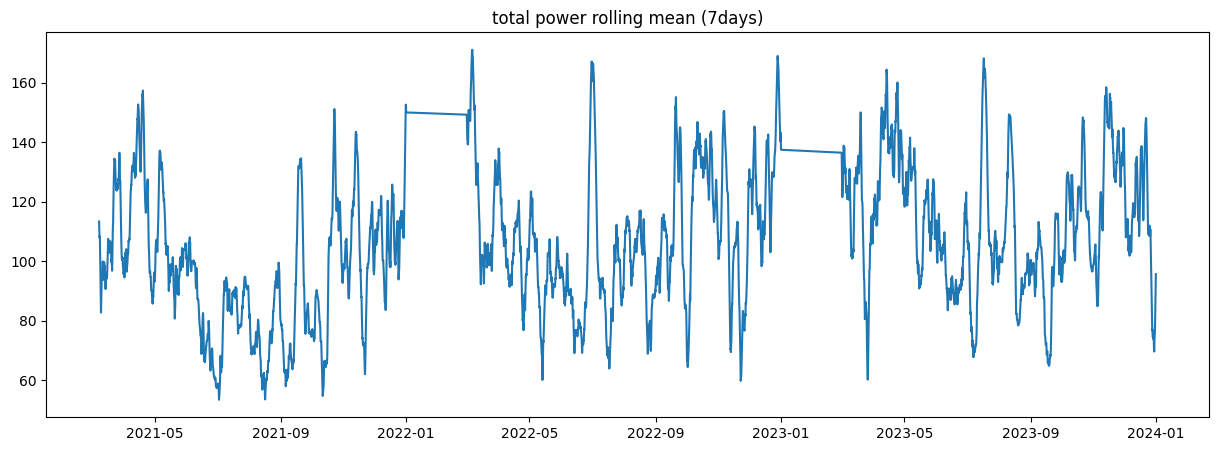

일시,3,4,5,6,7,8,9,10,11,12
season,0.0,0.0,0.0,1.0,1.0,1.0,2.0,2.0,3.0,3.0
총전력량,113.730596,121.030218,104.668253,92.440799,93.645291,92.414852,94.581903,113.732751,115.272602,117.885246
기온,12.029794,15.447037,19.142787,23.484861,28.074149,28.423880,24.803981,19.299373,14.313241,8.437142
강수량,0.101613,0.094444,0.170430,0.221759,0.299642,0.239740,0.390463,0.040412,0.101667,0.063486
풍속,3.006452,3.205093,2.858289,2.931296,3.097670,2.929167,3.211296,3.122760,3.570694,4.238799
습도,68.116039,67.473611,70.137545,77.524954,77.376792,75.385753,78.027315,67.517921,65.606481,66.125896
일조,0.247267,0.304352,0.297939,0.270000,0.235977,0.289337,0.199630,0.272984,0.195787,0.091667
일사,0.598253,0.788676,0.816407,0.803676,0.744225,0.765435,0.562417,0.570954,0.362338,0.202827
적설,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.195565
전운량,5.615267,5.292656,5.836979,6.619508,7.045498,5.972794,6.904630,4.726764,5.482870,7.065088


In [4]:
import matplotlib.pyplot as plt
import seaborn as sns

final = final.sort_values(by='일시').reset_index(drop=True)
final_eda = final.copy()
final_eda['rolling'] = final_eda['총전력량'].rolling(window=24 * 7 ).mean() # 일주일 이동 평균

fig,ax = plt.subplots(1,1,figsize=(15,5))
plt.plot(final_eda['일시'], final_eda['rolling'])
plt.title('total power rolling mean (7days)')
plt.show()

final.groupby([final['일시'].dt.month,'season']).mean(numeric_only=True).T # 월별, 계절별 수치 평균

일주일 평균을 살펴봤을 때 계절성 주기성을 보인다. 계절, 월별값에 대해 수치형 변수에 대한 평균값을 비교해 볼 수 있다.

## 2-3
1. 총전력량을 종속변수로 하고 종속변수와 다른 연속형 변수들간의 상관관계 분석을 진행하라. 유의확률을 포함하여 분석결과를 서술하라.
2. season에 따라 종속변수간의 차이가 있는지 통계적으로 확인하고 분석결과를 서술하라.

In [5]:
# 상관관계 분석 유의확률
from scipy.stats import pearsonr
result = []
for col in final.drop(columns =['일시','총전력량']).columns:
    corr, p = pearsonr(final['총전력량'], final[col])
    result.append([col, corr, p])

result_df = pd.DataFrame(result, columns=['컬럼','상관계수','p-value']).sort_values('상관계수').reset_index(drop=True)
result_df['p-value'] = result_df['p-value'].round(4)

result_df


,컬럼,상관계수,p-value
0,습도,-0.338387,0.0000
1,전운량,-0.028286,0.0000
2,강수량,-0.005195,0.4407
3,적설,0.008620,0.2007
4,기온,0.012500,0.0635
5,season,0.019192,0.0044
6,지면온도,0.236017,0.0000
7,일조,0.508636,0.0000
8,풍속,0.515133,0.0000
9,일사,0.629051,0.0000


상관계수가 유의미하지 않은(p값이 0.05 이상) 컬럼은 강수량, 적설, 기온이다.     
풍력과 태양열 발전량에 있어 강수량은 유의미하다 생각할 수 있지만 그렇지 않은 결과를 보였다.     
일사가 가장 높은 상관성을 보였으며 습도와는 가장 큰 음의 상관관계를 보였다.    

## 2-4
아래 기준으로 회귀모델링을 진행하고 평가하라.
1. 21년,22년도를 학습데이터, 23년도를 평가데이터로 사용한다.
2. RMSE를 포함한 적절한 평가지표 2가지로 판단
3. 일반 회귀모형 1개, 기계학습 모델 1개로 진행한다. 

In [12]:
train = final[final['일시'].dt.year.isin([2021,2022])].drop(columns =['일시']).reset_index(drop=True)
test = final[final['일시'].dt.year.isin([2023])].drop(columns =['일시']).reset_index(drop=True)

from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import LinearRegression
from sklearn.metrics import root_mean_squared_error, mean_absolute_error # 이건 특정 버전 이상에서만 동작가능


x_train = train.drop(columns=['총전력량'])
y_train = train['총전력량']
x_test  = test.drop(columns=['총전력량'])
y_test  = test['총전력량']

rf = RandomForestRegressor(random_state=0)
rf.fit(x_train,y_train)
rf_test_y_pred = rf.predict(x_test)
rf_rmse = root_mean_squared_error(y_test,rf_test_y_pred)
rf_mae = mean_absolute_error(y_test,rf_test_y_pred)

lr = LinearRegression()
lr.fit(x_train,y_train)
lr_test_y_pred = lr.predict(x_test)
lr_rmse = root_mean_squared_error(y_test,lr_test_y_pred)
lr_mae = mean_absolute_error(y_test,lr_test_y_pred)
print(f'RandomForestRegressor rmse:{rf_rmse}, mae:{rf_mae}')
print(f'LinearRegression rmse:{lr_rmse}, mae:{lr_mae}')

RandomForestRegressor rmse:58.490069476511906, mae:44.89999517293028
LinearRegression rmse:63.82772273427693, mae:49.88486202666442


/Users/egg/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_base.py:288: RuntimeWarning: divide by zero encountered in matmul
  return X @ coef_ + self.intercept_
/Users/egg/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_base.py:288: RuntimeWarning: overflow encountered in matmul
  return X @ coef_ + self.intercept_
/Users/egg/Library/Python/3.9/lib/python/site-packages/sklearn/linear_model/_base.py:288: RuntimeWarning: invalid value encountered in matmul
  return X @ coef_ + self.intercept_


# 통계분석(40점)

## 데이터 설명

출처: generate    
설명: 40명 남,여학생들의 3가지 학습방법에 따른 성적 데이터     
경로: ./data/student_scores.csv

In [45]:
df =pd.read_csv('./data/student_scores.csv')
df.head()

,id,성별,traindition,online,mix
0,1,Male,69,74,68
1,2,Male,59,65,63
2,3,Male,60,75,63
3,4,Male,79,52,76
4,5,Male,100,77,67


## 3-1
성별,교육방법에 따른 성적의 차이가 존재하는지 확인하려한다. 가설 검정 전 필요한 사전 가정을 설명하고 확인하라.

In [46]:
from scipy.stats import shapiro


# 그룹별 정규성 검증
df_melt = df.melt(['id','성별'])
df_melt.columns  =['id','Gender','Method','Score']

# 그룹별로 나누어 검정
groups = df_melt.groupby(['Gender', 'Method'])

for name, group in groups:
    stat, p = shapiro(group['Score'])
    print(f"{name}  p-value={p:.4f}")

# 'Female', 'online' 그룹만 정규성을 만족하지 않음, 나머지 그룹은 정규성을 만족함 -> 정규성을 만족한다 가정하고 다음 스텝 진행


# 등분산 검정

from scipy.stats import levene

# 각 집단 데이터 분리
male_tr = df_melt[(df_melt['Gender']=='Male') & (df_melt['Method']=='traindition')]['Score']
male_on = df_melt[(df_melt['Gender']=='Male') & (df_melt['Method']=='online')]['Score']
male_mix = df_melt[(df_melt['Gender']=='Male') & (df_melt['Method']=='mix')]['Score']

female_tr = df_melt[(df_melt['Gender']=='Female') & (df_melt['Method']=='traindition')]['Score']
female_on = df_melt[(df_melt['Gender']=='Female') & (df_melt['Method']=='online')]['Score']
female_mix = df_melt[(df_melt['Gender']=='Female') & (df_melt['Method']=='mix')]['Score']

# Levene 등분산 검정
stat, p = levene(male_tr, male_on, male_mix, female_tr, female_on, female_mix)
print(f"Levene Test: p-value={p:.4f}") # 0.05보다 크므로 등분산을 만족한다.

('Female', 'mix')  p-value=0.9943
('Female', 'online')  p-value=0.0490
('Female', 'traindition')  p-value=0.4725
('Male', 'mix')  p-value=0.0832
('Male', 'online')  p-value=0.6831
('Male', 'traindition')  p-value=0.0977
Levene Test: p-value=0.8172


## 3-2
통계검정을 진행 후 검정 후 주효과, 상호작용 검정을 진행하라

In [44]:
# 이원분산분석 진행

import statsmodels.api as sm
from statsmodels.formula.api import ols

# ANOVA 모델 적합
model = ols('Score ~ C(Gender) * C(Method)', data=df_melt).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

                           sum_sq     df         F    PR(>F)
C(Gender)               22.533333    1.0  0.189543  0.664120
C(Method)              117.650000    2.0  0.494816  0.610986
C(Gender):C(Method)     50.516667    2.0  0.212465  0.808908
Residual             13552.600000  114.0       NaN       NaN


# 3-3
주 효과에 대한 사후검정을 진행하라

- 성별, 교육방법, 상호작용 모두 p값이 0.05보다 크므로 차이가 있다고 볼 수 없다. 사후 검정이 필요하지 않다.
- 사후 검정 필요한 경우
    ```python
    from statsmodels.stats.multicomp import pairwise_tukeyhsd

    tukey = pairwise_tukeyhsd(endog=df_melt['Score'],
                            groups=df_melt['Method'],
                            alpha=0.05)
    print(tukey)
    ```

## 데이터 설명

출처: https://www.kaggle.com/datasets/whenamancodes/alcohol-effects-on-study?resource=download 후처리     
설명: 주변환경에 따른 성적 데이터      
경로: ./data/s4.csv
컬럼:    
- score : 성적 (종속변수)
- studytime : weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours)
- failures : number of past class failures (numeric: n if 1<=n<3, else 4)
- schoolsup : extra educational support (binary: yes or no)
- famsup : 	family educational support (binary: yes or no)
- absences : number of school absences (numeric: from 0 to 93)

In [51]:
import pandas as pd
df = pd.read_csv('./data/s4.csv')
df.head()

,ID,studytime,failures,schoolsup,famsup,absences,score
0,ID_1,2,0,yes,no,4,11
1,ID_2,2,0,no,yes,2,11
2,ID_3,2,0,yes,no,6,13
3,ID_4,3,0,no,yes,0,14
4,ID_5,2,0,no,yes,0,13


## 4-1
회귀모델이 유의한지 F검정에 대한 분석 및 결정계수 제시 및 해석

In [52]:
import statsmodels.api as sm

df['schoolsup'] = df['schoolsup'].map({'yes':1,'no':0})
df['famsup'] = df['famsup'].map({'yes':1,'no':0})

X = df.drop(columns =['score','ID'])
y = df['score']

X = sm.add_constant(X)
model = sm.OLS(y, X).fit()
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  score   R-squared:                       0.193
Model:                            OLS   Adj. R-squared:                  0.187
Method:                 Least Squares   F-statistic:                     30.77
Date:                Sat, 11 Oct 2025   Prob (F-statistic):           4.23e-28
Time:                        18:58:17   Log-Likelihood:                -1544.8
No. Observations:                 649   AIC:                             3102.
Df Residuals:                     643   BIC:                             3129.
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         10.8563      0.305     35.649      0.0

F 검정에 대한 p값은 4.23e-28으로 유의수준 0.05하에 유의하다. 결정계수는 0.193으로 모델의 설명력은 낮다.    

## 4-2
잔차를 통해 회귀모델의 유의성 검정

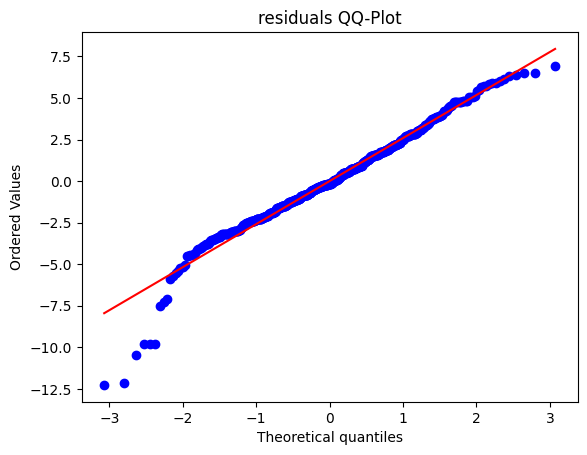

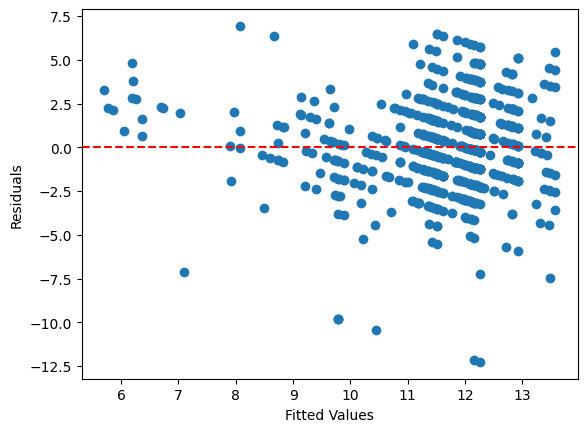

In [54]:
import matplotlib.pyplot as plt
import scipy.stats as stats

residuals = model.resid

# 정규성 검정
stats.shapiro(residuals)

# QQ-Plot
stats.probplot(residuals, dist="norm", plot=plt)
plt.title("residuals QQ-Plot")
plt.show()

# 잔차 vs 예측값 산점도
plt.scatter(model.fittedvalues, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Fitted Values')
plt.ylabel('Residuals')
plt.show()

# 4-3
다중공선성이 있는지 VIF로 측정 및 확인 및 제언

In [55]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif = pd.DataFrame()
vif["Variable"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i)
              for i in range(X.shape[1])]
print(vif)

    Variable       VIF
0      const  8.718677
1  studytime  1.062409
2   failures  1.034501
3  schoolsup  1.015338
4     famsup  1.029342
5   absences  1.032705


10이하의 값들만 가지므로 다중공선성은 없다

# 4-4
회귀계수 및 검정 결과로 가장 유의한 변수 무엇인지 설명하라. 

In [57]:
model.summary().tables[1]

,coef,std err,t,P>|t|,[0.025,0.975]
const,10.8563,0.305,35.649,0.000,10.258,11.454
studytime,0.6519,0.128,5.083,0.000,0.400,0.904
failures,-1.7207,0.177,-9.723,0.000,-2.068,-1.373
schoolsup,-0.7479,0.339,-2.204,0.028,-1.414,-0.082
famsup,0.1060,0.215,0.493,0.622,-0.316,0.528
absences,-0.0409,0.023,-1.811,0.071,-0.085,0.003


p값이 낮은 studytime, failures가 유의하다 볼 수 있다.